<a href="https://colab.research.google.com/github/satvik314/ai_experiments/blob/main/Personal_AI_Assistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install pyautogen

In [22]:
from getpass import getpass

OPENAI_API_KEY = getpass()

··········


In [23]:
import autogen

config_list = [
    {
        "model" : "gpt-4-0125-preview",
        "api_key" : OPENAI_API_KEY
    }
]

llm_config = {
    "config_list" : config_list,
    "temperature" : 0.9
}

## Game Developer Assistant

In [25]:
# Create user proxy agent, coder, product manager
user_proxy = autogen.UserProxyAgent(
    name="User_proxy",
    system_message="A human admin who will give the idea and run the code provided by Coder.",
    code_execution_config={"last_n_messages": 2, "work_dir": "groupchat"},
    human_input_mode="ALWAYS",
)
coder = autogen.AssistantAgent(
    name="Coder",
    # system_message = "You are talented Python developer who is good at developing games. You closely work with Product Manager."
    llm_config=llm_config,
)
pm = autogen.AssistantAgent(
    name="product_manager",
    system_message="You will help break down the initial idea into a well scoped requirement for the coder; Do not involve in future conversations or error fixing",
    llm_config=llm_config,
)

# Create groupchat
groupchat = autogen.GroupChat(
    agents=[user_proxy, coder, pm], messages=[])
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)

# Start the conversation
user_proxy.initiate_chat(
    manager, message="Build a classic & basic pong game with 2 players in python")

User_proxy (to chat_manager):

Build a classic & basic pong game with 2 players in python

--------------------------------------------------------------------------------
product_manager (to chat_manager):

To develop a basic Pong game with 2 players in Python, we'll need to outline a series of requirements and steps to ensure the developer has a clear understanding of what needs to be done. Here's a breakdown of the project scope:

### 1. Environment Setup

- **Programming Language**: Python (Ensure Python is installed)
- **Graphics Library**: Pygame (A popular library for making games in Python, install using pip: `pip install pygame`)

### 2. Game Overview

- **Game Type**: Classic Pong Game
- **Players**: 2 (Player 1 vs. Player 2)
- **Game Objective**: Players control paddles to hit the ball back and forth. The goal is to make the ball pass the opponent's paddle.

### 3. Game Components

- **Window**: A game window with a set size (e.g., 800x600 pixels)
- **Paddles**: Two paddles,

ChatResult(chat_history=[{'content': 'Build a classic & basic pong game with 2 players in python', 'role': 'assistant'}, {'content': "To develop a basic Pong game with 2 players in Python, we'll need to outline a series of requirements and steps to ensure the developer has a clear understanding of what needs to be done. Here's a breakdown of the project scope:\n\n### 1. Environment Setup\n\n- **Programming Language**: Python (Ensure Python is installed)\n- **Graphics Library**: Pygame (A popular library for making games in Python, install using pip: `pip install pygame`)\n\n### 2. Game Overview\n\n- **Game Type**: Classic Pong Game\n- **Players**: 2 (Player 1 vs. Player 2)\n- **Game Objective**: Players control paddles to hit the ball back and forth. The goal is to make the ball pass the opponent's paddle.\n\n### 3. Game Components\n\n- **Window**: A game window with a set size (e.g., 800x600 pixels)\n- **Paddles**: Two paddles, one controlled by each player. Control mechanisms:\n    -

In [ ]:
user_proxy = autogen.UserProxyAgent(
    name="User_proxy",
    system_message="A human admin.",
    code_execution_config={
        "last_n_messages": 2,
        "work_dir": "groupchat",
        "use_docker": False,
    },
    human_input_mode="TERMINATE",
)
coder = autogen.AssistantAgent(
    name="Coder",
    llm_config=llm_config,
)
pm = autogen.AssistantAgent(
    name="Product_manager",
    system_message="Creative in software product ideas.",
    llm_config=llm_config,
)

In [ ]:
groupchat = autogen.GroupChat(agents=[user_proxy, coder, pm], messages=[], max_round=12)
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)

In [ ]:

user_proxy.initiate_chat(
    manager, message="Find a latest paper about gpt-4 on arxiv and find its potential applications in software."
)

User_proxy (to chat_manager):

Find a latest paper about gpt-4 on arxiv and find its potential applications in software.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
User_proxy (to chat_manager):



--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
User_proxy (to chat_manager):



--------------------------------------------------------------------------------
Coder (to chat_manager):

To find the latest paper about GPT-4 on arXiv, we will use the arXiv API to search for papers related to "GPT-4". We'll then parse the search results to find the most recent paper and extract information about its potential applications in software.

First, we'll execute a Python script to search for papers related to "GPT-4" on arXiv and list the metadata of the most recent one. This includes the title, authors, publication date, and abstract which might give us insights into i

ChatResult(chat_history=[{'content': 'Find a latest paper about gpt-4 on arxiv and find its potential applications in software.', 'role': 'assistant'}, {'content': '', 'role': 'assistant'}, {'content': '', 'role': 'assistant'}, {'content': 'To find the latest paper about GPT-4 on arXiv, we will use the arXiv API to search for papers related to "GPT-4". We\'ll then parse the search results to find the most recent paper and extract information about its potential applications in software.\n\nFirst, we\'ll execute a Python script to search for papers related to "GPT-4" on arXiv and list the metadata of the most recent one. This includes the title, authors, publication date, and abstract which might give us insights into its applications in software.\n\n```python\nimport feedparser\n\n# Construct the query URL for the arXiv API\nquery_url = "http://export.arxiv.org/api/query?search_query=all:GPT-4&start=0&max_results=1&sortBy=submittedDate&sortOrder=descending"\n\n# Parse the feed using fe

In [ ]:
assistant = autogen.AssistantAgent(
    name = "Assistant",
    llm_config = llm_config,
)

# create a UserProxyAgent instance named "user_proxy"
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config={
        "work_dir": "coding",
        "use_docker": False,
    },
)
# the assistant receives a message from the user_proxy, which contains the task description
user_proxy.initiate_chat(
    assistant,
    message="""What date is today? Compare the year-to-date gain for META and TESLA.""",
)

user_proxy (to Assistant):

What date is today? Compare the year-to-date gain for META and TESLA.

--------------------------------------------------------------------------------
Assistant (to user_proxy):

First, let's obtain the current date using Python:

```python
from datetime import datetime

# Get the current date
current_date = datetime.now()

# Print the current date in the format: Year-Month-Day
print(current_date.strftime('%Y-%m-%d'))
```

Please run this code to find out today's date. Then, we will proceed with comparing the year-to-date (YTD) gain for META (Facebook's parent company) and TESLA.

--------------------------------------------------------------------------------

>>>>>>>> EXECUTING CODE BLOCK 0 (inferred language is python)...
user_proxy (to Assistant):

exitcode: 0 (execution succeeded)
Code output: 
2024-02-18


--------------------------------------------------------------------------------
Assistant (to user_proxy):

With today's date established as Febru

ChatResult(chat_history=[{'content': 'What date is today? Compare the year-to-date gain for META and TESLA.', 'role': 'assistant'}, {'content': "First, let's obtain the current date using Python:\n\n```python\nfrom datetime import datetime\n\n# Get the current date\ncurrent_date = datetime.now()\n\n# Print the current date in the format: Year-Month-Day\nprint(current_date.strftime('%Y-%m-%d'))\n```\n\nPlease run this code to find out today's date. Then, we will proceed with comparing the year-to-date (YTD) gain for META (Facebook's parent company) and TESLA.", 'role': 'user'}, {'content': 'exitcode: 0 (execution succeeded)\nCode output: \n2024-02-18\n', 'role': 'assistant'}, {'content': "With today's date established as February 18, 2024, we will now proceed to compare the year-to-date (YTD) gain for META (Facebook's parent company) and TESLA.\n\nTo do this, we'll need to fetch the stock prices for META and TESLA from the beginning of the year (January 1, 2024) to today (February 18, 2

In [ ]:
# followup of the previous question
user_proxy.send(
    recipient=assistant,
    message="""Plot a chart of their stock price change YTD and save to stock_price_ytd.png.""",
)

user_proxy (to Assistant):

Plot a chart of their stock price change YTD and save to stock_price_ytd.png.

--------------------------------------------------------------------------------
Assistant (to user_proxy):

Given the limitations around real-time web access and specific stock market data retrieval, I'll provide a general Python code snippet that demonstrates how you could plot a chart of the year-to-date (YTD) stock price changes for META and TESLA, assuming you have the necessary data or can fetch it from a financial data API such as Alpha Vantage, IEX Cloud, or similar. This example will utilize `matplotlib` for plotting the chart and `pandas` for data manipulation, which are common Python libraries for such tasks.

Please follow these general steps:
1. Obtain the YTD stock prices for META and TESLA from a reliable data source.
2. Prepare your environment by installing necessary Python libraries (`pandas`, `matplotlib`).
3. Use the provided Python code snippet as a guideline 

ChatResult(chat_history=[{'content': 'What date is today? Compare the year-to-date gain for META and TESLA.', 'role': 'assistant'}, {'content': "First, let's obtain the current date using Python:\n\n```python\nfrom datetime import datetime\n\n# Get the current date\ncurrent_date = datetime.now()\n\n# Print the current date in the format: Year-Month-Day\nprint(current_date.strftime('%Y-%m-%d'))\n```\n\nPlease run this code to find out today's date. Then, we will proceed with comparing the year-to-date (YTD) gain for META (Facebook's parent company) and TESLA.", 'role': 'user'}, {'content': 'exitcode: 0 (execution succeeded)\nCode output: \n2024-02-18\n', 'role': 'assistant'}, {'content': "With today's date established as February 18, 2024, we will now proceed to compare the year-to-date (YTD) gain for META (Facebook's parent company) and TESLA.\n\nTo do this, we'll need to fetch the stock prices for META and TESLA from the beginning of the year (January 1, 2024) to today (February 18, 2

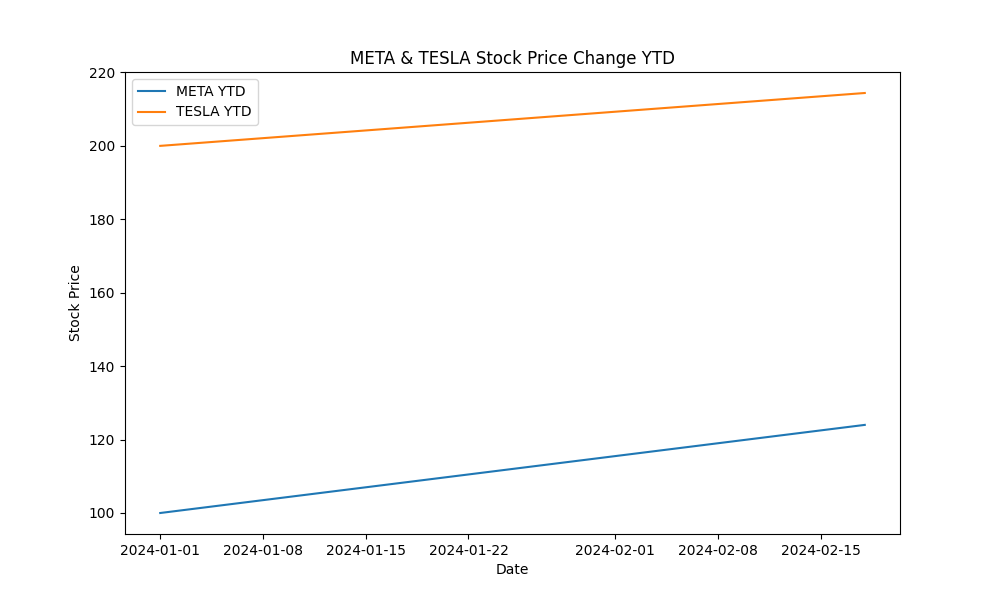

In [ ]:
from IPython.display import Image

Image(filename='coding/stock_price_ytd.png')